In [1]:
#Load Libraries
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
#Load dataset
df = pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#Shape of Data Frame
df.shape

(41188, 21)

In [5]:
#Columns in Data Frame
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
#Info on Fields, Records, missing data & Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
#Checking for null value (also confirmed in df.info() above)
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
#Lets look at each of the variables & their distributions

In [9]:
#Look at summaries for Object Data
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

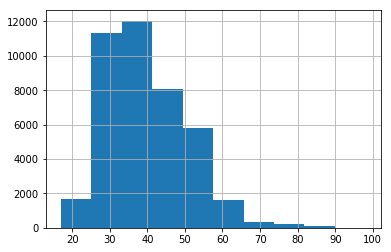

In [10]:
#Plot for Object Data
df.age.hist()
plt.show()

In [11]:
#Statistcs by Response Variabel & Age
df.groupby('y')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,39.911185,9.898132,17.0,32.0,38.0,47.0,95.0
yes,4640.0,40.913147,13.837476,17.0,31.0,37.0,50.0,98.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000183AC14E780>,
      dtype=object)

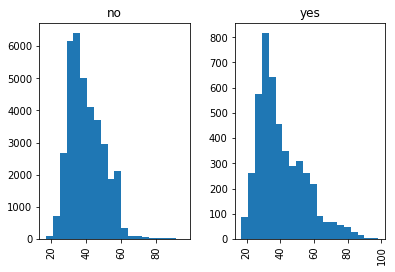

In [13]:
df.hist(column='age', by='y', grid=True, xlabelsize=None, xrot=None, ylabelsize=None, bins=20)

In [12]:
#Look at summaries for Object Data
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

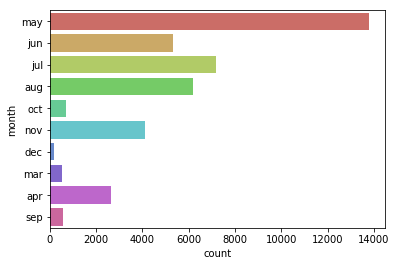

In [15]:
#Plot for Object Data
sns.countplot(y='month', data=df, palette='hls')
plt.show()

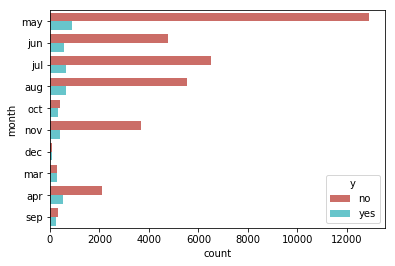

In [16]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(y='month', data=df, hue='y', palette='hls')
plt.show()

In [13]:
#Look at summaries for Object Data
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

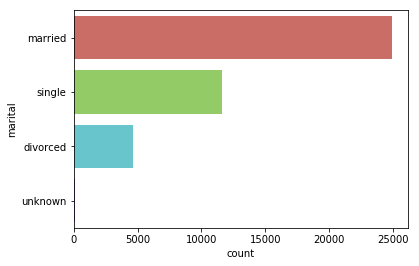

In [18]:
#Plot for Object Data
sns.countplot(y='marital', data=df, palette='hls')
plt.show()

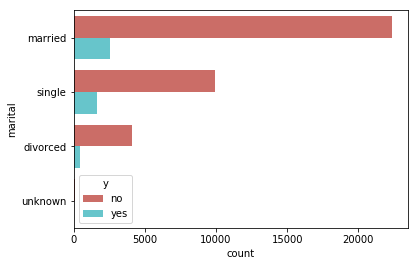

In [19]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(y='marital', data=df, hue='y', palette='hls')
plt.show()

In [14]:
#Look at summaries for Object Data
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

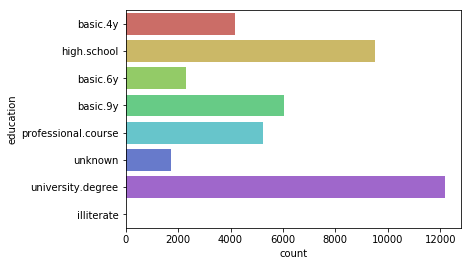

In [21]:
#Plot for Object Data
sns.countplot(y='education', data=df, palette='hls')
plt.show()

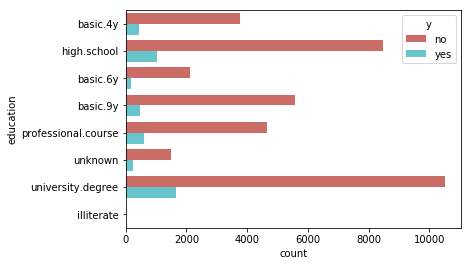

In [22]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(y='education', data=df, hue='y', palette='hls')
plt.show()

In [15]:
# Need to assign same category for basic.4y, high.school, basic.6y, & basic.9y together for Education

In [16]:
#Look at summaries for Object Data
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

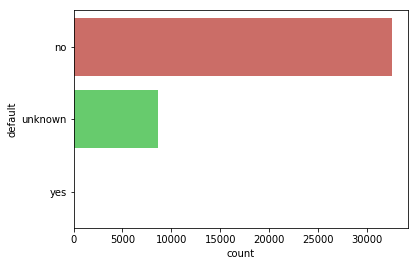

In [25]:
#Plot for Object Data
sns.countplot(y='default', data=df, palette='hls')
plt.show()

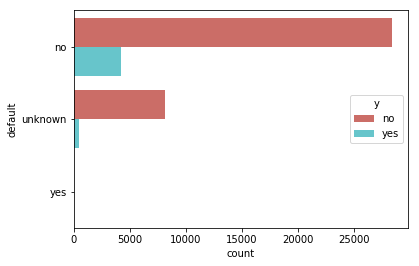

In [26]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(y='default', data=df, hue='y', palette='hls')
plt.show()

In [17]:
#Look at summaries for Object Data
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

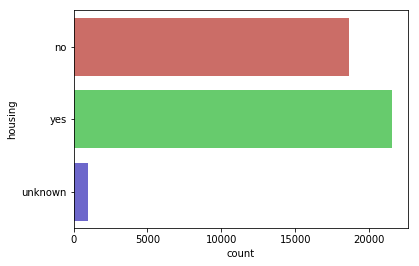

In [28]:
#Plot for Object Data
sns.countplot(y='housing', data=df, palette='hls')
plt.show()

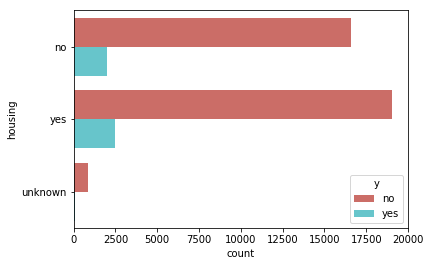

In [29]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(y='housing', data=df, hue='y', palette='hls')
plt.show()

In [18]:
#Look at summaries for Object Data
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

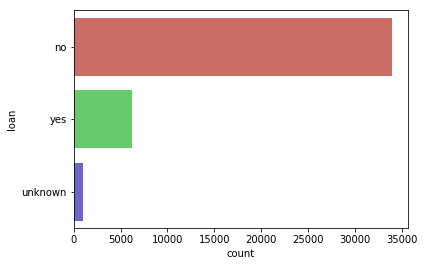

In [31]:
#Plot for Object Data
sns.countplot(y='loan', data=df, palette='hls')
plt.show()

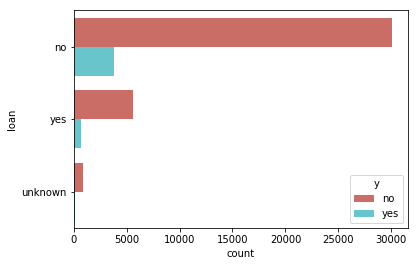

In [32]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(y='loan', data=df, hue='y', palette='hls')
plt.show()

In [19]:
#Look at summaries for Object Data
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

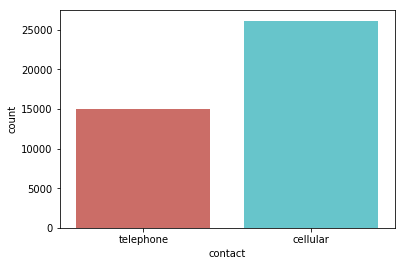

In [34]:
#Plot for Object Data
sns.countplot(x='contact', data=df, palette='hls')
plt.show()

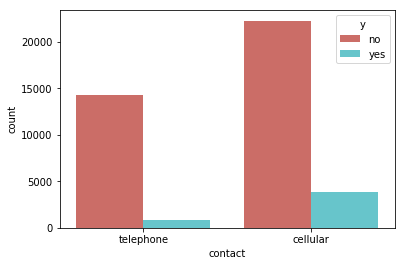

In [20]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(x='contact', data=df, hue='y', palette='hls')
plt.show()

In [21]:
#Look at summaries for Object Data
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

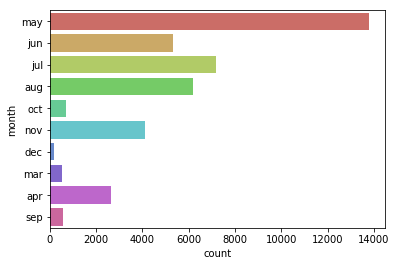

In [37]:
#Plot for Object Data
sns.countplot(y='month', data=df, palette='hls')
plt.show()

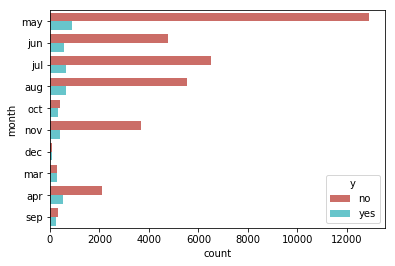

In [38]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(y='month', data=df, hue='y', palette='hls')
plt.show()

In [22]:
#Look at summaries for Object Data
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

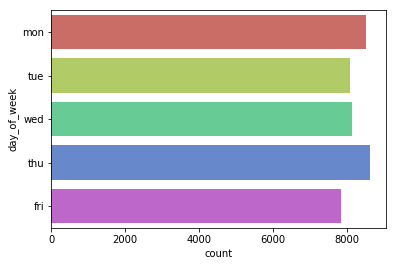

In [40]:
#Plot for Object Data
sns.countplot(y='day_of_week', data=df, palette='hls')
plt.show()

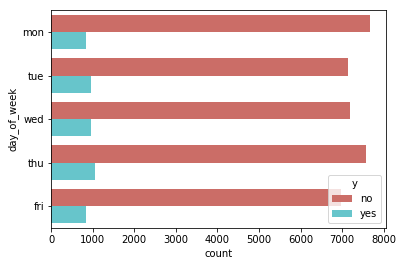

In [41]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(y='day_of_week', data=df, hue='y', palette='hls')
plt.show()

In [23]:
#Look at summaries for Object Data
df['duration'].value_counts()

85      170
90      170
136     168
73      167
124     164
87      162
72      161
104     161
111     160
106     159
109     158
97      158
122     157
135     156
92      156
114     156
139     155
96      155
119     155
82      154
89      153
76      153
71      152
126     152
125     152
93      151
107     150
88      150
83      149
123     149
       ... 
2184      1
1395      1
1555      1
1556      1
1447      1
1492      1
3509      1
1460      1
1364      1
1300      1
3078      1
1095      1
1191      1
1255      1
1287      1
3366      1
1479      1
2035      1
1575      1
1767      1
1236      1
3253      1
2089      1
1204      1
1140      1
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

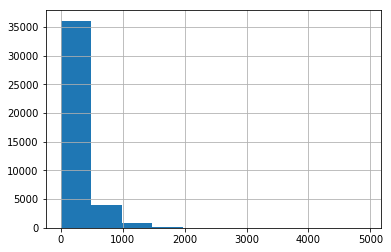

In [43]:
#Plot for Object Data
df.duration.hist()
plt.show()

In [24]:
#Statistcs by Response Variabel & Age
df.groupby('y')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
yes,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000183AC33FF98>,
      dtype=object)

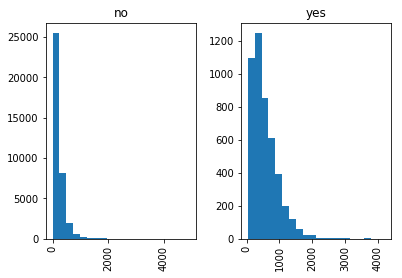

In [45]:
df.hist(column='duration', by='y', grid=True, xlabelsize=None, xrot=None, ylabelsize=None, bins=20)

In [25]:
#Look at summaries for Object Data
df['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

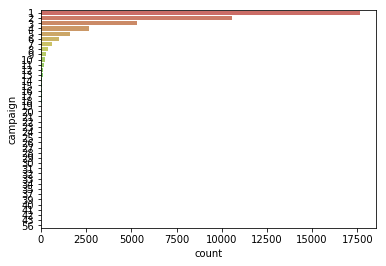

In [47]:
#Plot for Object Data
sns.countplot(y='campaign', data=df, palette='hls')
plt.show()

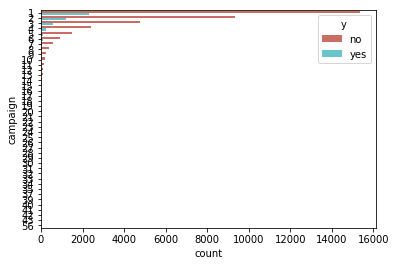

In [48]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(y='campaign', data=df, hue='y', palette='hls')
plt.show()

In [26]:
#Look at summaries for Object Data
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

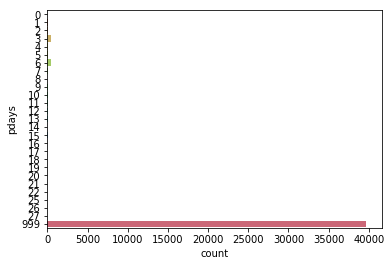

In [50]:
#Plot for Object Data
sns.countplot(y='pdays', data=df, palette='hls')
plt.show()

In [27]:
#Determine % of pdays
df.groupby('pdays').size() * 100 / len(df)

pdays
0       0.036418
1       0.063125
2       0.148101
3       1.065844
4       0.286491
5       0.111683
6       1.000291
7       0.145673
8       0.043702
9       0.155385
10      0.126250
11      0.067981
12      0.140818
13      0.087404
14      0.048558
15      0.058269
16      0.026707
17      0.019423
18      0.016995
19      0.007284
20      0.002428
21      0.004856
22      0.007284
25      0.002428
26      0.002428
27      0.002428
999    96.321744
dtype: float64

In [28]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign(numeric, -1 means client was not previously contacted)
# pdays may be a canadate of a variable to be removed from dataset due to 96.3% of the data residing in value of 999 days.
# Should not have impact on response variable. Look at corr heatmap later to determine its suitability in dataset.

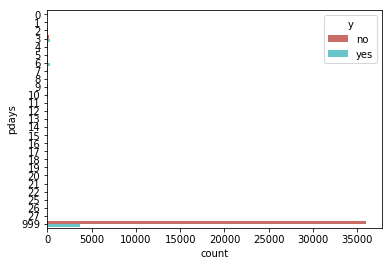

In [55]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(y='pdays', data=df, hue='y', palette='hls')
plt.show()

In [29]:
#Look at summaries for Object Data
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

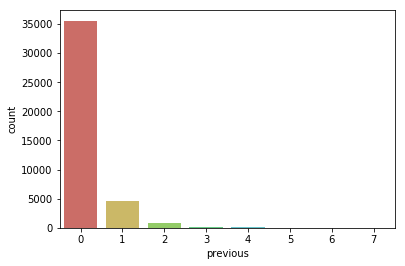

In [57]:
#Plot for Object Data
sns.countplot(x='previous', data=df, palette='hls')
plt.show()

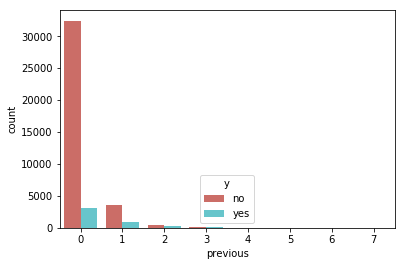

In [58]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(x='previous', data=df, hue='y', palette='hls')
plt.show()

In [30]:
#Look at summaries for Object Data
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

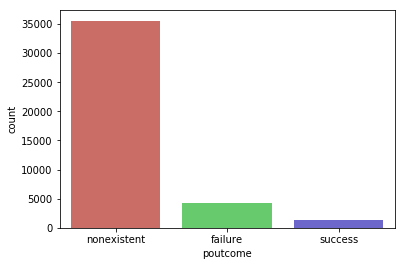

In [31]:
#Plot for Object Data
sns.countplot(x='poutcome', data=df, palette='hls')
plt.show()

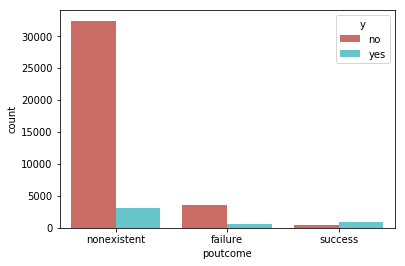

In [61]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(x='poutcome', data=df, hue='y', palette='hls')
plt.show()

In [32]:
#Look at summaries for Object Data
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

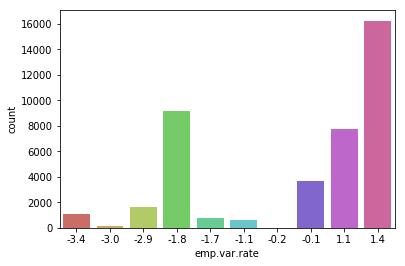

In [63]:
#Plot for Object Data
sns.countplot(x='emp.var.rate', data=df, palette='hls')
plt.show()

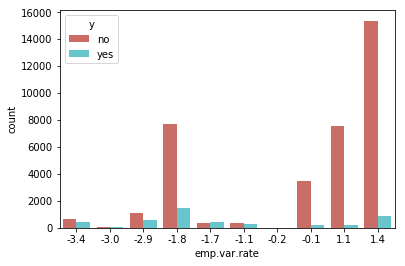

In [64]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(x='emp.var.rate', data=df, hue='y', palette='hls')
plt.show()

In [33]:
#Look at summaries for Object Data
df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

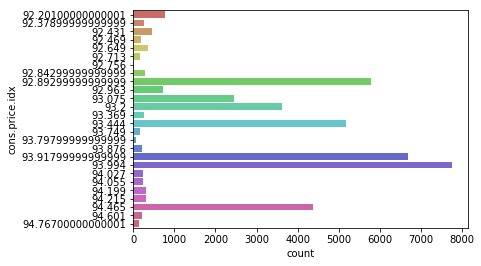

In [66]:
#Plot for Object Data
sns.countplot(y='cons.price.idx', data=df, palette='hls')
plt.show()

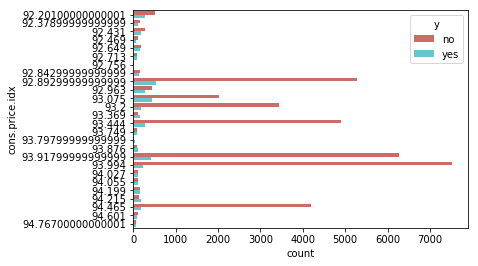

In [67]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(y='cons.price.idx', data=df, hue='y', palette='hls')
plt.show()

In [34]:
#Look at summaries for Object Data
df['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

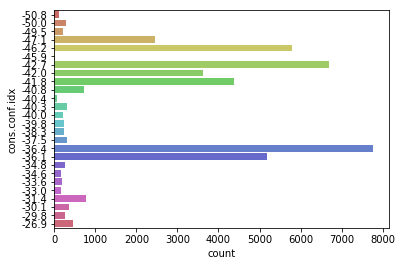

In [69]:
#Plot for Object Data
sns.countplot(y='cons.conf.idx', data=df, palette='hls')
plt.show()

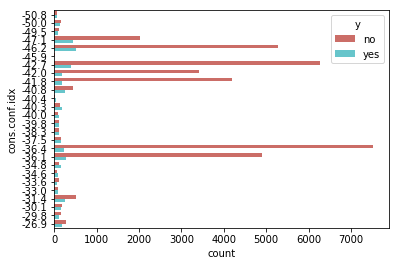

In [70]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(y='cons.conf.idx', data=df, hue='y', palette='hls')
plt.show()

In [35]:
#Look at summaries for Object Data
df['euribor3m'].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
4.964    1175
1.405    1169
4.965    1071
4.864    1044
4.960    1013
4.968     992
4.959     895
4.860     892
4.855     840
4.076     822
1.266     820
4.859     788
4.120     756
4.858     733
4.153     690
4.021     676
4.967     643
1.281     637
4.966     622
4.191     610
1.250     587
4.958     581
1.291     544
1.327     538
4.957     537
         ... 
0.914       3
4.474       3
1.018       3
1.007       3
1.778       3
0.927       2
4.733       2
3.879       2
0.749       2
0.953       2
0.937       2
0.921       2
3.563       2
0.969       1
3.329       1
1.047       1
3.743       1
3.428       1
3.901       1
1.574       1
3.488       1
3.853       1
3.669       1
3.053       1
3.816       1
1.045       1
0.956       1
0.933       1
3.282       1
0.996       1
Name: euribor3m, Length: 316, dtype: int64

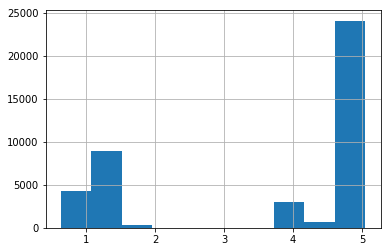

In [72]:
#Plot for Object Data
df.euribor3m.hist()
plt.show()

In [36]:
#Statistcs by Response Variabel & Age
df.groupby('y')['euribor3m'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,36548.0,3.811491,1.638187,0.634,1.405,4.857,4.962,5.045
yes,4640.0,2.123135,1.742598,0.634,0.849,1.266,4.406,5.045


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000183AC3AEB70>,
      dtype=object)

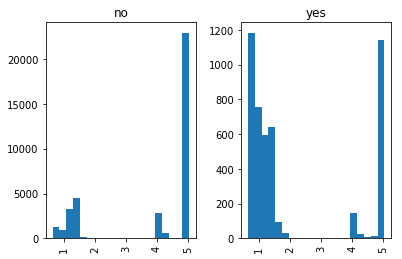

In [74]:
df.hist(column='euribor3m', by='y', grid=True, xlabelsize=None, xrot=None, ylabelsize=None, bins=20)

In [37]:
#Look at summaries for Object Data
df['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

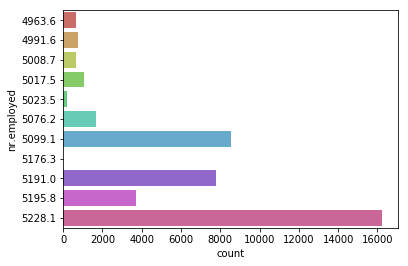

In [76]:
#Plot for Object Data
sns.countplot(y='nr.employed', data=df, palette='hls')
plt.show()

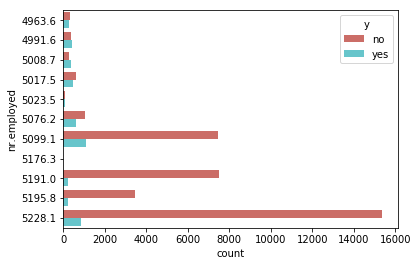

In [77]:
#Plot for Object Data (Switched x & y label in order to read y values due to too many for x label)
sns.countplot(y='nr.employed', data=df, hue='y', palette='hls')
plt.show()

In [38]:
#Look at summaries for Object Data
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

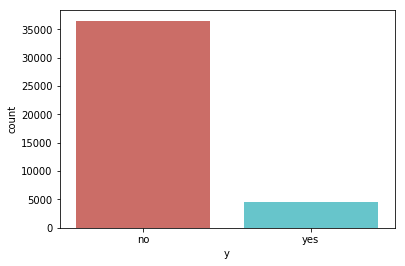

In [79]:
#Plot for Object Data
sns.countplot(x='y', data=df, palette='hls')
plt.show()

Need to convert Objects into Bianry Values for further analysis

In [39]:
#Look at Object Data - Determine how many binary values for each Object

# Marital - (Married , Single , Divorced, Unknown)",
# Job - (Management,BlueCollar,Technician,entrepreneur,retired,admin.,services,selfemployed,housemaid,student,unemployed,unknown)
# Contact - (Telephone,Cellular)
# Education - (university.degree,high.school,basic.9y,professional.course,basic.4y,basic.6y,unknown,illiterate)
# Month - (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
# Poutcome - (nonexistent, failure, success)
# Housing - (yes,no, unknown)
# Loan - (yes, no, unknown)
# Default - (yes, no, unknown)
# Day of the Week - ()

In [40]:
#First Change data type from Object to Category & confirm using dtypes()

In [41]:
df["marital"] = df["marital"].astype('category')
df["job"] = df["job"].astype('category')
df["contact"] = df["contact"].astype('category')
df["education"] = df["education"].astype('category')
df["month"] = df["month"].astype('category')
df["poutcome"] = df["poutcome"].astype('category')
df["housing"] = df["housing"].astype('category')
df["loan"] = df["loan"].astype('category')
df["default"] = df["default"].astype('category')
df["day_of_week"] = df["day_of_week"].astype('category')
df.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                   object
dtype: object

In [42]:
#Create Function to do the assigning of binary for each object/category variables
def binaryType_(df):
  
    df.marital.replace(('married','single','divorced', 'unknown'),(1,2,3,4),inplace=True)    
    df.contact.replace(('telephone','cellular'),(1,2),inplace=True)   
    df.education.replace(('university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','unknown','illiterate'),(1,2,2,3,2,2,4,5),inplace=True)
    df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    df.poutcome.replace(('nonexistent', 'failure', 'success'),(1,2,3),inplace=True)   
    df.housing.replace(('yes', 'no', 'unknown'), (1,0,2), inplace=True)
    df.loan.replace(('yes', 'no', 'unknown'),(1,0,2),inplace=True)
    df.default.replace(('yes', 'no', 'unknown'),(1,0,2),inplace=True)
    df.day_of_week.replace(('fri', 'mon', 'thu', 'tue', 'wed'),(6,2,5,3,4),inplace=True)
    df.y.replace(('yes', 'no'),(1,0),inplace=True)
    return df

In [43]:
#Execute the function to assign binary values to object/category variables
df = binaryType_(df)

In [44]:
#Check to verify binary assignment worked on Object/Category variables
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,2,0,0,0,1,5,2,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,1,2,2,0,0,1,5,2,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,1,2,0,1,0,1,5,2,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,1,2,0,0,0,1,5,2,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,1,2,0,0,1,1,5,2,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


C:\Users\USer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\USer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\USer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\USer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


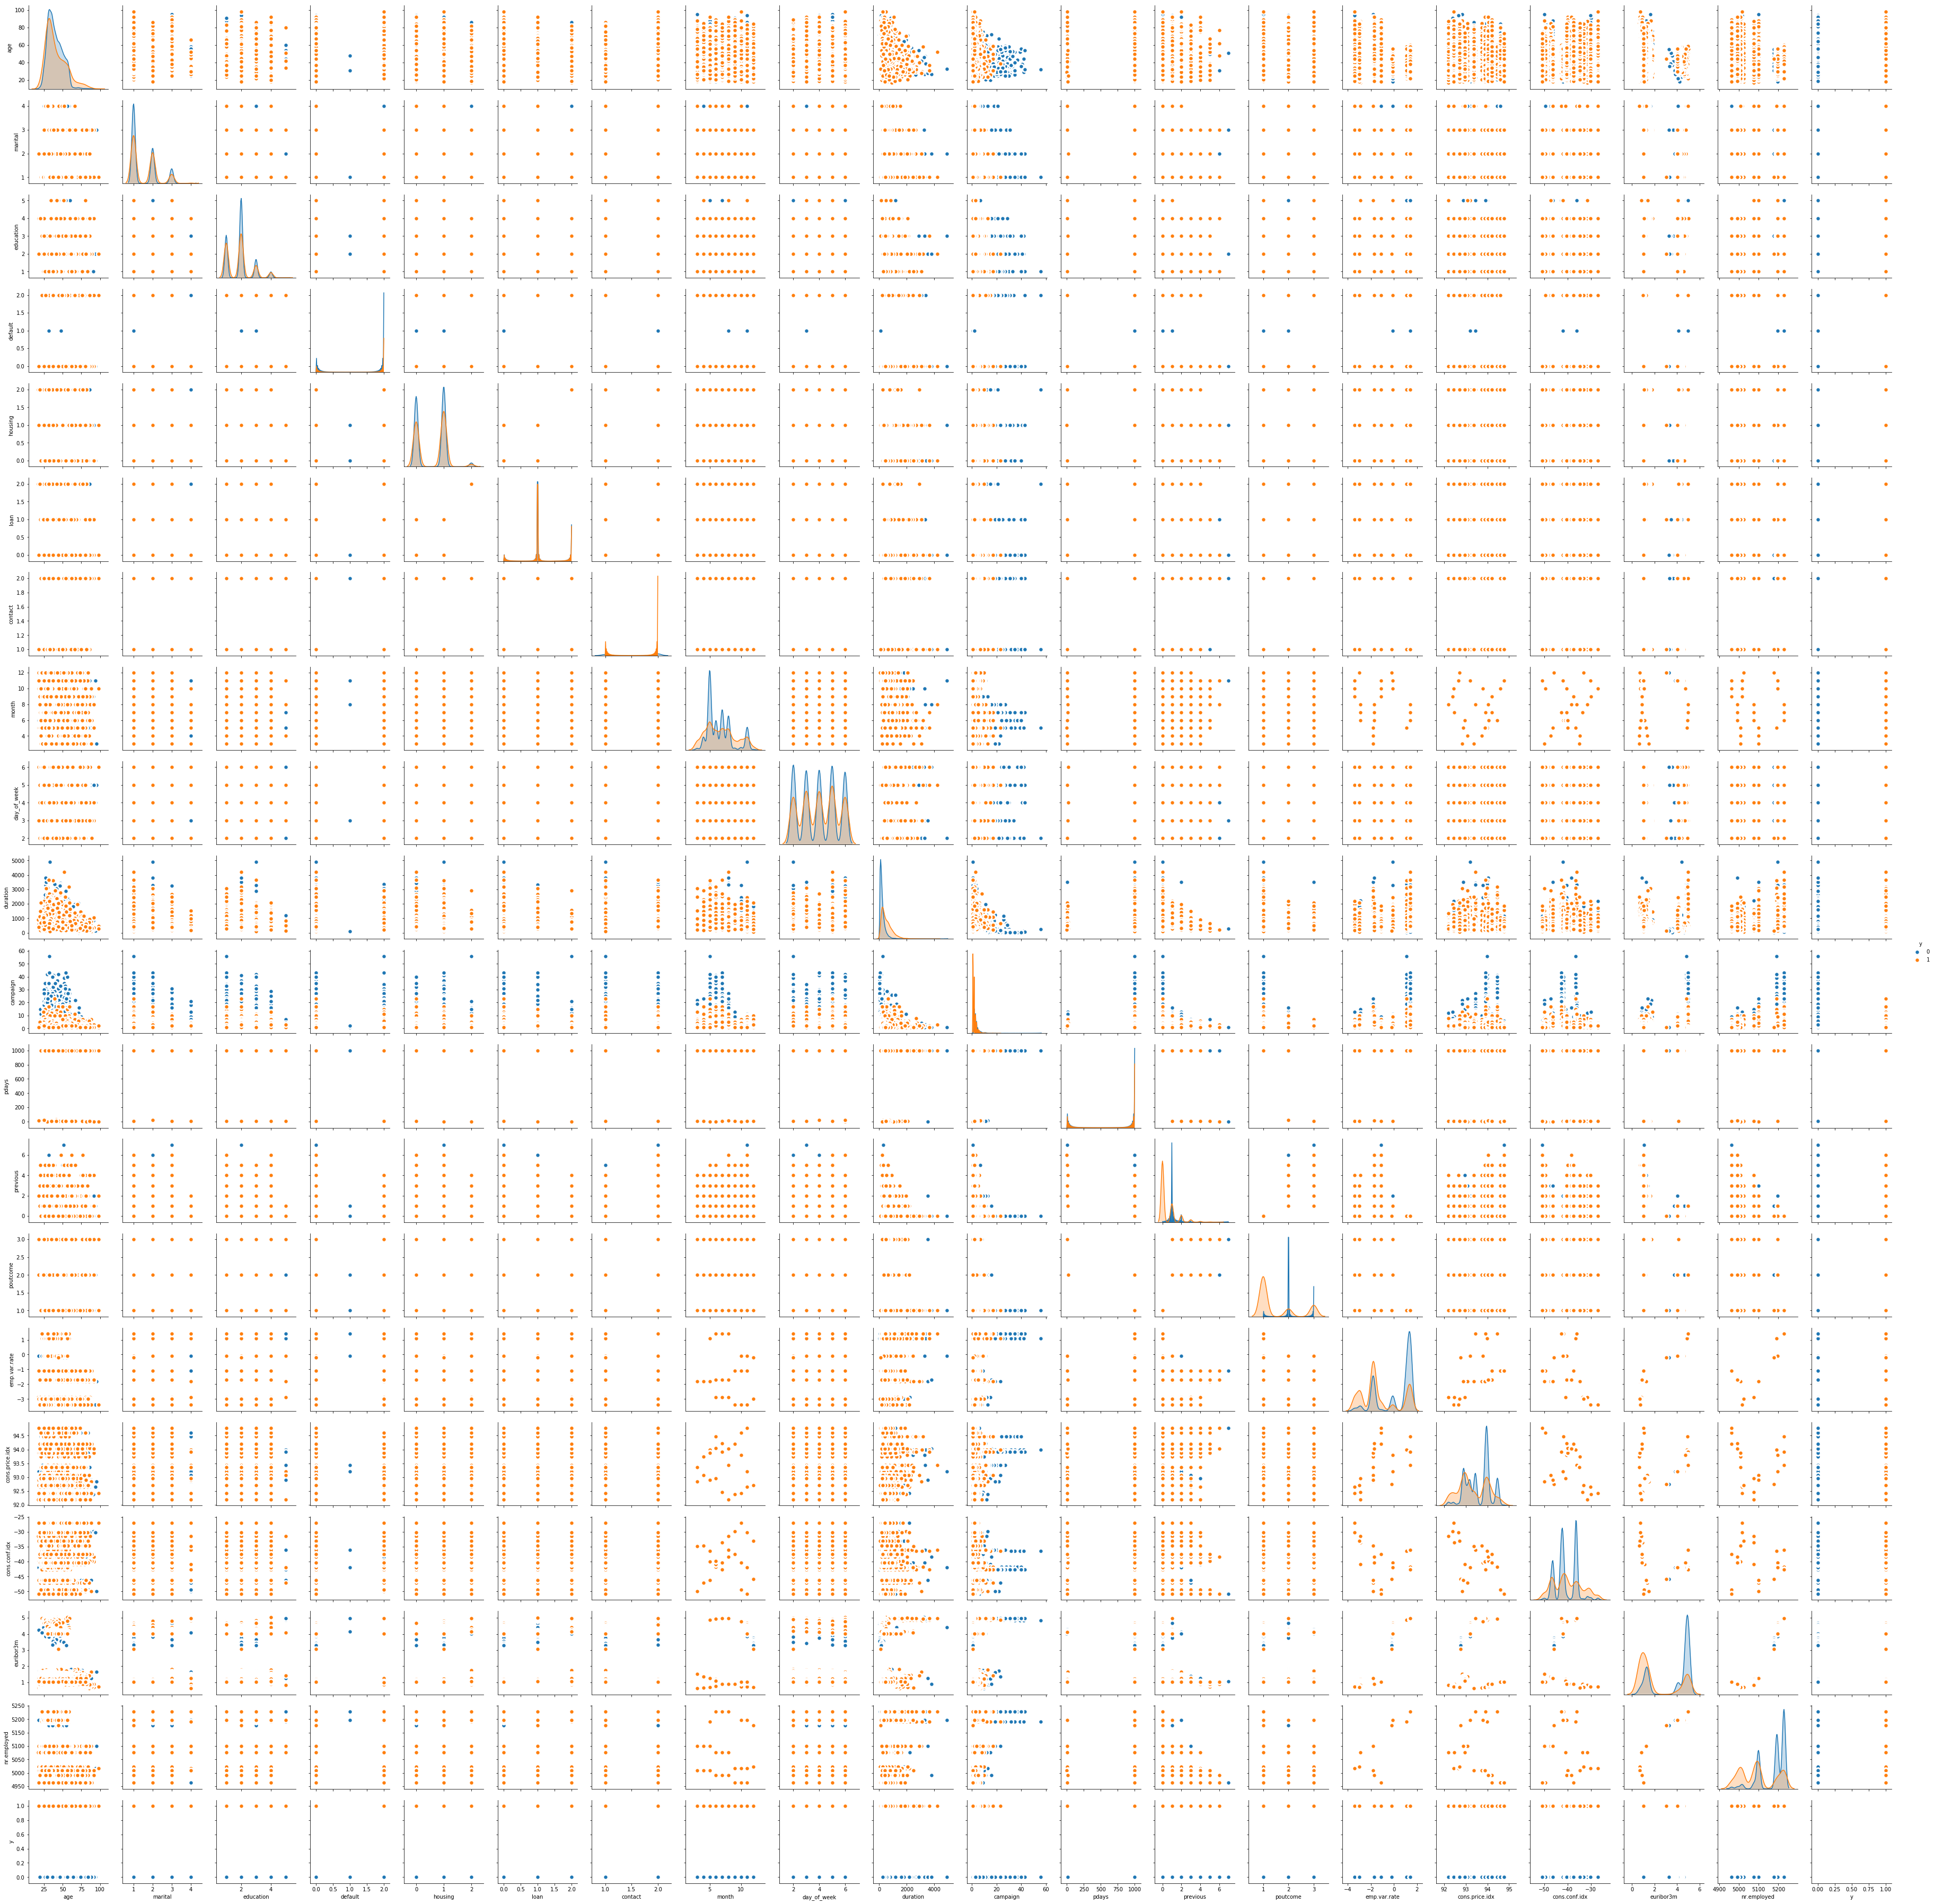

In [86]:
#Pair Plot with Histogram
sns.pairplot(df, kind="scatter", hue="y", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [45]:
# Convert Job Variable to new columns
df = pd.get_dummies(df, columns=["job"], prefix=["job"])

In [46]:
df.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,1,2,0,0,0,1,5,2,261,...,0,1,0,0,0,0,0,0,0,0
1,57,1,2,2,0,0,1,5,2,149,...,0,0,0,0,0,1,0,0,0,0
2,37,1,2,0,1,0,1,5,2,226,...,0,0,0,0,0,1,0,0,0,0
3,40,1,2,0,0,0,1,5,2,151,...,0,0,0,0,0,0,0,0,0,0
4,56,1,2,0,0,1,1,5,2,307,...,0,0,0,0,0,1,0,0,0,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 32 columns):
age                  41188 non-null int64
marital              41188 non-null int64
education            41188 non-null int64
default              41188 non-null int64
housing              41188 non-null int64
loan                 41188 non-null int64
contact              41188 non-null int64
month                41188 non-null int64
day_of_week          41188 non-null int64
duration             41188 non-null int64
campaign             41188 non-null int64
pdays                41188 non-null int64
previous             41188 non-null int64
poutcome             41188 non-null int64
emp.var.rate         41188 non-null float64
cons.price.idx       41188 non-null float64
cons.conf.idx        41188 non-null float64
euribor3m            41188 non-null float64
nr.employed          41188 non-null float64
y                    41188 non-null int64
job_admin.           41188 non-null uint8

In [48]:
df["job_admin."] = df["job_admin."].astype('int64')
df["job_blue-collar"] = df["job_blue-collar"].astype('int64')
df["job_entrepreneur"] = df["job_entrepreneur"].astype('int64')
df["job_housemaid"] = df["job_housemaid"].astype('int64')
df["job_management"] = df["job_management"].astype('int64')
df["job_retired"] = df["job_retired"].astype('int64')
df["job_self-employed"] = df["job_self-employed"].astype('int64')
df["job_services"] = df["job_services"].astype('int64')
df["job_student"] = df["job_student"].astype('int64')
df["job_technician"] = df["job_technician"].astype('int64')
df["job_unemployed"] = df["job_unemployed"].astype('int64')
df["job_unknown"] = df["job_unknown"].astype('int64')
df["y"] = df["y"].astype('int64')
df.dtypes

age                    int64
marital                int64
education              int64
default                int64
housing                int64
loan                   int64
contact                int64
month                  int64
day_of_week            int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
poutcome               int64
emp.var.rate         float64
cons.price.idx       float64
cons.conf.idx        float64
euribor3m            float64
nr.employed          float64
y                      int64
job_admin.             int64
job_blue-collar        int64
job_entrepreneur       int64
job_housemaid          int64
job_management         int64
job_retired            int64
job_self-employed      int64
job_services           int64
job_student            int64
job_technician         int64
job_unemployed         int64
job_unknown            int64
dtype: object

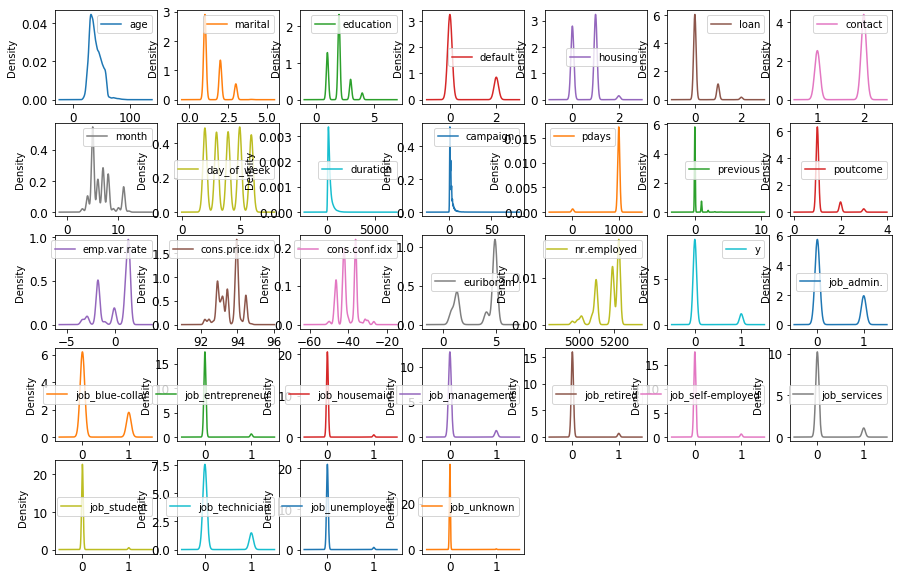

In [91]:
#Density Plots
plt = df.plot(kind= 'density', subplots=True, layout=(5,7), sharex=False,sharey=False,fontsize=12, figsize=(15,10))

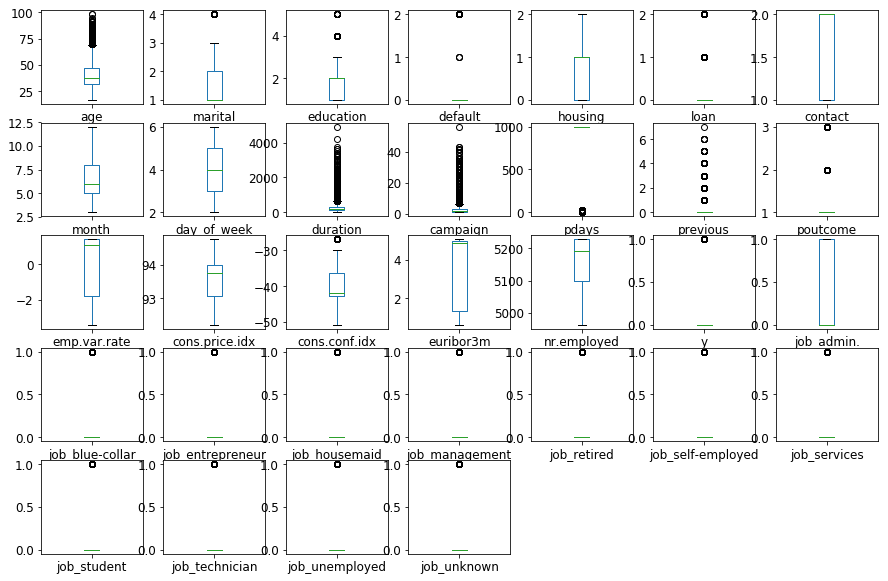

In [92]:
# box and whisker plots
plt=df.plot(kind= 'box' , subplots=True, layout=(5,7), sharex=False, sharey=False,fontsize=12,figsize=(15,10))

In [96]:
#sns.heatmap(df, annot=True, annot_kws={"size": 7})
#sns.plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 32 columns):
age                  41188 non-null int64
marital              41188 non-null int64
education            41188 non-null int64
default              41188 non-null int64
housing              41188 non-null int64
loan                 41188 non-null int64
contact              41188 non-null int64
month                41188 non-null int64
day_of_week          41188 non-null int64
duration             41188 non-null int64
campaign             41188 non-null int64
pdays                41188 non-null int64
previous             41188 non-null int64
poutcome             41188 non-null int64
emp.var.rate         41188 non-null float64
cons.price.idx       41188 non-null float64
cons.conf.idx        41188 non-null float64
euribor3m            41188 non-null float64
nr.employed          41188 non-null float64
y                    41188 non-null int64
job_admin.           41188 non-null int64

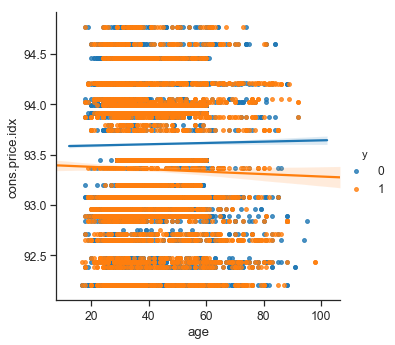

In [98]:
#Scatter Plot of age & cons.price.idx with Regression Lines

# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('age', # Horizontal axis
           'cons.price.idx', # Vertical axis
           data=df, # Data source
           fit_reg=True, # Fix a regression line
           hue="y", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 15}) # S marker size

In [50]:
#Define X & Y
Y = df[['y']]
X = df.drop('y', axis=1)

In [51]:
#Split Testing & Training Datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0,)

In [112]:
#Logistic Regression Model

In [55]:
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)

C:\Users\USer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
Y_pred = LogReg.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
Y_true = Y_test
tn, fp, fn, tp = sk_confusion_matrix(Y_true, Y_pred).ravel()

In [58]:
def confusion_matrix(Y_test, Y_pred):
    cm=sk_confusion_matrix(Y_test, Y_pred)
    cm=pd.DataFrame(data=cm, columns=[0,1], index=[0,1])
    cm.columns.name = 'Predicted lebel'
    cm.index.name = 'True lebel'
    error_rate = (Y_pred != Y_test).mean()
    print('error rate: %.2f' % error_rate)
    return cm

In [59]:
sk_confusion_matrix(Y_true, Y_pred)

array([[10696,   273],
       [  816,   572]], dtype=int64)

In [60]:
tn, fp, fn, tp

(10696, 273, 816, 572)

In [61]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10969
           1       0.68      0.41      0.51      1388

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [62]:
print('acc on train dataset: {:.3f}'.format(LogReg.score(X_train,Y_train)))
print('acc on test dataset: {:.3f}'.format(LogReg.score(X_test,Y_test)))

acc on train dataset: 0.910
acc on test dataset: 0.912


In [ ]:
roc_auc_score(Y_test, Y_pred)

In [69]:
LogReg.coef_

array([[ 0.0010264 ,  0.01942719, -0.02181439, -0.16601391, -0.01603421,
        -0.0781164 ,  0.52542469, -0.02420886,  0.00265503,  0.0045075 ,
        -0.03263133, -0.00207364, -0.19505145, -0.21288543, -0.3101597 ,
         0.50194301,  0.04079448, -0.01672232, -0.00922123,  0.01884708,
        -0.37844502,  0.00586813,  0.01640261,  0.09262603,  0.18615209,
        -0.01750105, -0.15305415,  0.16106658,  0.04946695,  0.03202446,
        -0.01090713]])

In [77]:
list(X.columns).index('emp.var.rate')

14

In [90]:
LogReg.coef_.reshape(1,31)[0][14]

-0.3101596987667459

In [91]:
LogReg.coef_.reshape(1,31)[0][15]

0.5019430142174486

In [79]:
X.columns

Index(['age', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown'],
      dtype='object')

# Interpretation
**emp.var.rate** – The coefficient (or parameter estimate) for the variable emp.var.rate is -0.3101596987667459.  This means that for a one-unit increase in emp.var.rate , we expect a -0.3101596987667459 increase in the log-odds of the dependent variable **y**, holding all other independent variables constant.  

**cons.price.idx** – The coefficient (or parameter estimate) for the variable cons.price.idx is 0.5019430142174486.  This means that for a one-unit increase in cons.price.idx , we expect a 0.5019430142174486 increase in the log-odds of the dependent variable **y**, holding all other independent variables constant.